# Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
# We start by loading the data
data = pd.read_csv('1.01. Simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

In [3]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [4]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [5]:
y.shape

(84,)

In [6]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

In [7]:
#x_matrix

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
# We start by creating a linear regression object
reg = LinearRegression()

In [9]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x_matrix,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [32]:
# The arrays are shuffled
X_train, X_test, y_train, y_test = train_test_split(x_matrix, y, test_size=0.2, random_state=0) 

In [33]:
X_train

array([[1934],
       [1857],
       [2021],
       [2050],
       [1808],
       [1850],
       [2041],
       [1887],
       [1925],
       [1975],
       [1764],
       [1685],
       [1861],
       [1891],
       [1764],
       [1855],
       [1907],
       [1964],
       [1693],
       [1872],
       [1674],
       [1777],
       [1670],
       [1997],
       [1966],
       [1714],
       [1880],
       [2020],
       [1775],
       [1893],
       [1687],
       [1735],
       [1934],
       [1634],
       [1936],
       [1664],
       [1775],
       [1778],
       [1773],
       [1953],
       [1786],
       [1794],
       [1855],
       [1979],
       [1974],
       [1849],
       [1842],
       [1987],
       [1962],
       [1761],
       [1843],
       [1826],
       [1954],
       [1824],
       [1831],
       [1832],
       [1781],
       [1735],
       [1933],
       [1808],
       [1722],
       [1850],
       [1810],
       [1934],
       [1893],
       [1956],
       [19

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)


0.16586478019104378


In [15]:
#For retrieving the slope:
print(regressor.coef_)

[0.00171033]


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.28,3.191433
1,3.37,3.355624
2,3.39,3.076841
3,3.41,3.247873
4,3.20,3.010138
5,3.44,3.379569
6,2.54,3.176040
7,3.47,3.124730
8,3.28,3.222219
9,3.01,3.230770


In [18]:
reg.score(X_test,y_test)

0.32608319518467277

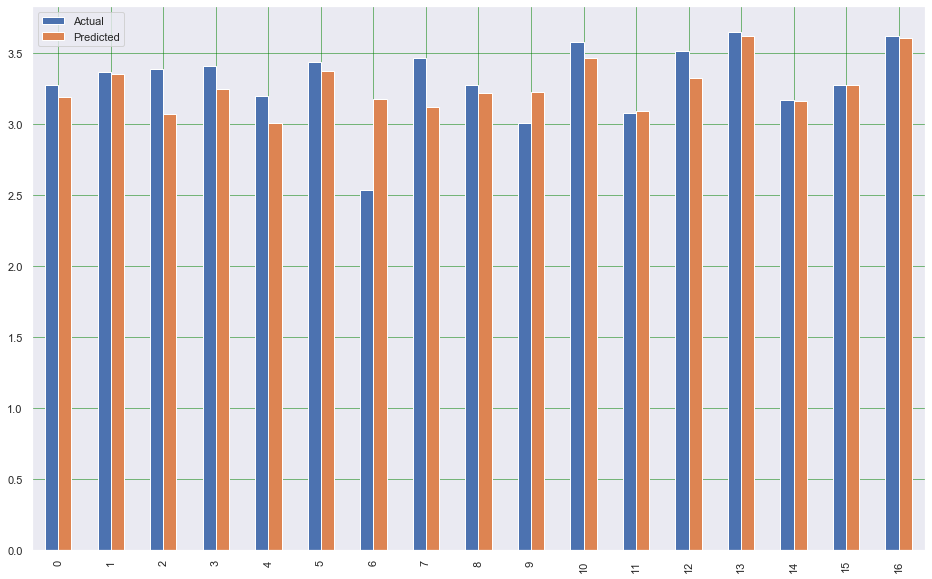

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

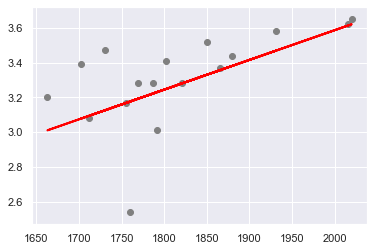

In [20]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14375509721383473
Mean Squared Error: 0.04691776855623536
Root Mean Squared Error: 0.2166050981769251
